# Curva 02:

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
sns.set(color_codes=True)
sns.set_style("whitegrid")

# Import & Data Preparation

In [23]:
path_to_file = '/home/ospcx/MyProyects/MCPI/MCPI_Homework/04_DM/Curva_01/src/bike.csv'
data = np.genfromtxt(path_to_file, delimiter=",")
m, n = data.shape

In [76]:
test, training = data[:70,:], data[70:,:]
# saving x, y, xval, yval, xtest and ytest into numpy arrays
n, m = training.shape

#------------------------------
x_train = training[:,:-1] # np.genfromtxt('x_train.csv', delimiter=",")#
x_test  = test[:,:-1] # np.genfromtxt('x_test.csv', delimiter=",")#
#------------------------------
y_train = training[:, -1] # np.genfromtxt('y_train.csv', delimiter=",")#
y_test  = test[:, -1] # np.genfromtxt('y_test.csv', delimiter=",")#
#------------------------------

# -----------------------------
print("x train: {0}".format(x_train.shape))
print("y train: {0}".format(y_train.shape))
print("-------------------")
print("x test: {0}".format(x_test.shape))
print("y test: {0}".format(y_test.shape))

x train: (661, 13)
y train: (661,)
-------------------
x test: (70, 13)
y test: (70,)


In [77]:
x = x_train
y = y_train
y = y.reshape(-1,1)
y_test = y_test.reshape(-1,1)
m,n = x.shape
theta = np.ones(n)
lambda_= 1

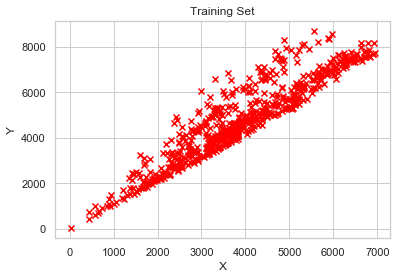

In [78]:
plt.scatter(x_train[:,-1], y_train, color='red', marker='x')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Implementation

In [79]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [80]:
def linear_reg_cost(theta_flatten, x_flatten, y, lambda_, num_of_samples, num_of_features):
    x = x_flatten.reshape(num_of_samples, num_of_features)
    theta = theta_flatten.reshape(n,1)
    loss = hypothesis(x,theta)-y
    regularizer = lambda_*np.sum(theta[1:,:]**2)/(2*m)
    j = np.sum(loss ** 2)/(2*m) 
    return j

# Test Cost Function

In [81]:
m,n = x.shape
theta = np.ones(n)
lambda_= 1
linear_reg_cost(theta.flatten(), x.flatten(),y,lambda_,m,n)

158.38570119338345

# Regularized Linear Regresion

In [82]:
error_train = np.zeros(m)
error_val = np.zeros(m)
lambda_ = 1

In [83]:
from scipy.optimize import fmin_cg

def train_val_error(x, y, xval, yval, lambda_):
    m,n = x.shape
    theta = np.ones(n) # initialize theta for each time of training with subset of training set.
    new_theta = fmin_cg(f=linear_reg_cost, x0=theta, fprime=linear_reg_grad, args=(x.flatten(), y, lambda_, m,n))
    t_error = linear_reg_cost(new_theta.flatten(), x.flatten(), y, 0, x.shape[0], x.shape[1])
    v_error = linear_reg_cost(new_theta.flatten(), xval.flatten(), yval, 0, xval.shape[0], xval.shape[1])
    return (t_error, v_error)

def learning_curve(x, y, xval, yval, lambda_):
    m,n = x.shape
    et_array = np.zeros(m)
    ev_array = np.zeros(m)
    for i in range(1,m):
        et_array[i] , ev_array[i] = train_val_error(x[0:i,:],y[0:i],xval,yval,lambda_)
    return (et_array,ev_array)

error_train, error_val = learning_curve(x,y,x_test,y_test,lambda_,)

         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 87
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 208
         Gradient evaluations: 196
         Current function value: 0.000650
         Iterations: 158
         Function evaluations: 995
         Gradient evaluations: 984
         Current function value: 0.000596
         Iterations: 141
         Function evaluations: 850
         Gradient evaluations: 833
         Current function value: 0.001105
         Iterations: 53
         Function evaluations: 387
         Gradient evaluations: 370
         Current function value: 0.002195
         Iterations: 74
         Function evaluations: 523
         Gradient evaluations: 506
         Current function value: 0.006519
         Iterations: 116
         Function evaluations: 687
         Gradient evaluations: 669
         Current function value: 0.005746
     

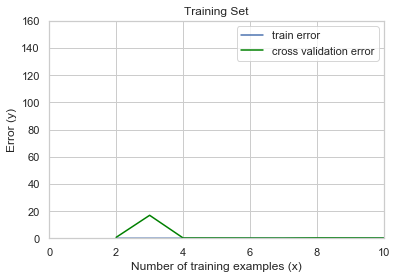

In [84]:
plt.plot(np.arange(2,m+1),error_train[1:], label = 'train error')
plt.plot(np.arange(2,m+1),error_val[1:], label = 'cross validation error', color= 'green')
plt.axis([0, 10, 0, 160])
plt.title('Training Set')
plt.xlabel('Number of training examples (x)')
plt.ylabel('Error (y)')
plt.legend()
plt.show()